# LOGISTIC REGRESSION

## Logistic Regression performed on multidimensional dataset using 
- scikit-learn
- python

### Installing and Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Using Scikit Learn

#### STEP - 1
- Importing csv file containing our dataset
- Splitting the dataset into training and test set
- Reshaping the dimensions
- Visualizing dataset using graphs

In [3]:
hr_data = pd.read_csv('hr_data.txt', sep=',')

In [4]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
hr_data.sample(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7627,0.58,0.86,3,182,3,0,0,0,RandD,low
14376,0.11,0.84,7,296,4,0,1,0,sales,low
5086,0.70,0.56,4,107,6,0,0,0,support,medium
10793,0.61,0.56,4,176,3,0,0,0,hr,medium
1948,0.40,0.56,2,148,3,0,1,0,technical,medium
12219,0.89,0.87,5,225,5,0,1,0,product_mng,low
2278,0.78,0.99,3,151,3,1,0,0,product_mng,low
5308,0.81,0.92,5,255,4,1,0,0,technical,low
13097,0.63,0.71,4,244,2,0,0,0,support,low
1137,0.87,0.88,5,262,6,0,1,0,sales,low


In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
hr_data.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [8]:
hr_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
hr_data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [10]:
hr_data[hr_data.left==1].sample(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1241,0.43,0.53,2,148,3,0,1,0,sales,medium
1093,0.89,0.91,5,260,5,0,1,0,sales,low
12420,0.09,0.96,6,268,4,0,1,0,technical,medium
457,0.77,1.00,4,255,5,0,1,0,RandD,medium
14321,0.43,0.47,2,144,3,0,1,0,hr,medium
1635,0.43,0.47,2,137,3,0,1,0,hr,medium
1558,0.14,0.61,6,291,5,0,1,0,hr,medium
929,0.83,0.82,4,243,5,0,1,0,sales,medium
12758,0.39,0.54,2,127,3,0,1,0,sales,low
268,0.38,0.56,2,156,3,0,1,0,technical,low


In [11]:
left = hr_data[hr_data.left==1]
left.sample(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
890,0.43,0.57,2,131,3,1,1,0,support,medium
12389,0.42,0.57,2,154,3,1,1,0,marketing,medium
12349,0.40,0.46,2,149,3,0,1,0,technical,medium
1603,0.44,0.51,2,145,3,0,1,0,marketing,low
225,0.90,0.97,4,258,5,0,1,0,accounting,low
12137,0.42,0.48,2,129,3,0,1,0,management,low
929,0.83,0.82,4,243,5,0,1,0,sales,medium
14657,0.44,0.46,2,143,3,0,1,0,IT,low
1045,0.40,0.57,2,128,3,0,1,0,support,medium
12399,0.10,0.87,6,250,4,0,1,0,sales,low


In [12]:
left.shape

(3571, 10)

In [13]:
left[left.salary=='low'].shape[0]

2172

In [14]:
left[left.promotion_last_5years>0].shape[0]

19

In [15]:
left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [16]:
hr_data.groupby('left').describe().T

left                                    0            1
satisfaction_level    count  11428.000000  3571.000000
                      mean       0.666810     0.440098
                      std        0.217104     0.263933
                      min        0.120000     0.090000
                      25%        0.540000     0.130000
                      50%        0.690000     0.410000
                      75%        0.840000     0.730000
                      max        1.000000     0.920000
last_evaluation       count  11428.000000  3571.000000
                      mean       0.715473     0.718113
                      std        0.162005     0.197673
                      min        0.360000     0.450000
                      25%        0.580000     0.520000
                      50%        0.710000     0.790000
                      75%        0.850000     0.900000
                      max        1.000000     1.000000
number_project        count  11428.000000  3571.000000
                      mean       3.786664     3.855503
                      std        0.979884     1.818165
                      min        2.000000     2.000000
                      25%        3.000000     2.000000
                      50%        4.000000     4.000000
                      75%        4.000000     6.000000
                      max        6.000000     7.000000
average_montly_hours  count  11428.000000  3571.000000
                      mean     199.060203   207.419210
                      std       45.682731    61.202825
                      min       96.000000   126.000000
                      25%      162.000000   146.000000
                      50%      198.000000   224.000000
                      75%      238.000000   262.000000
                      max      287.000000   310.000000
time_spend_company    count  11428.000000  3571.000000
                      mean       3.380032     3.876505
                      std        1.562348     0.977698
                      min        2.000000     2.000000
                      25%        2.000000     3.000000
                      50%        3.000000     4.000000
                      75%        4.000000     5.000000
                      max       10.000000     6.000000
Work_accident         count  11428.000000  3571.000000
                      mean       0.175009     0.047326
                      std        0.379991     0.212364
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000
promotion_last_5years count  11428.000000  3571.000000
                      mean       0.026251     0.005321
                      std        0.159889     0.072759
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000

In [17]:
retained = hr_data[hr_data.left==0]
retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [18]:
retained.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


<AxesSubplot:xlabel='salary', ylabel='count'>

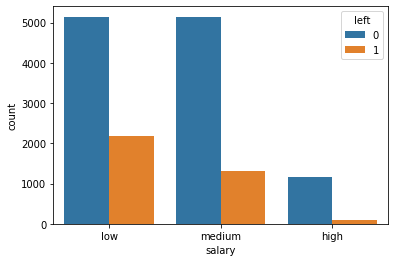

In [19]:
sns.countplot(data=hr_data, x=hr_data.salary, hue='left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

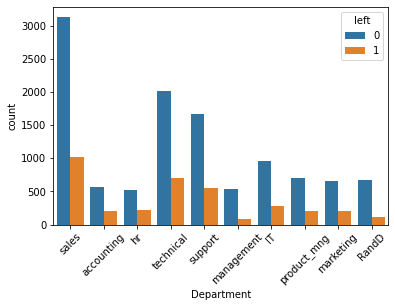

In [20]:
sns.countplot(data=hr_data, x='Department', hue='left')
plt.xticks(rotation=45)

In [21]:
hr_data[hr_data.left==1].Department.value_counts()/hr_data.Department.value_counts()

IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: Department, dtype: float64

In [22]:
hr_data[hr_data.left == 0].Department.value_counts()/hr_data.Department.value_counts()

IT             0.777506
RandD          0.846252
accounting     0.734029
hr             0.709066
management     0.855556
marketing      0.763403
product_mng    0.780488
sales          0.755072
support        0.751009
technical      0.743750
Name: Department, dtype: float64

In [23]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [24]:
dataset = hr_data[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'time_spend_company', 'Department']]
dataset

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,time_spend_company,Department
0,0.38,157,0,low,3,sales
1,0.80,262,0,medium,6,sales
2,0.11,272,0,medium,4,sales
3,0.72,223,0,low,5,sales
4,0.37,159,0,low,3,sales
...,...,...,...,...,...,...
14994,0.40,151,0,low,3,support
14995,0.37,160,0,low,3,support
14996,0.37,143,0,low,3,support
14997,0.11,280,0,low,4,support


In [25]:
slry = pd.get_dummies(dataset.salary)
depts = pd.get_dummies(dataset.Department)

In [26]:
dataset = pd.concat([dataset, slry, depts], axis=1)
dataset.drop(['salary', 'Department'], axis=1, inplace=True)
dataset

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,157,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,272,0,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,223,0,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,160,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,143,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,280,0,4,0,1,0,0,0,0,0,0,0,0,0,1,0


In [27]:
dataset.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,157,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,272,0,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,223,0,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [28]:
X = dataset
y = hr_data.left

In [29]:
y.shape

(14999,)

#### Splitting dataset

In [30]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(13499, 17)
(1500, 17)
(13499,)
(1500,)


In [32]:
train_y = train_y.values.reshape((-1, 1))
test_y = test_y.values.reshape((-1, 1))

In [33]:
print(train_y.shape)
print(test_y.shape)

(13499, 1)
(1500, 1)


#### STEP-2

- modelling the logistic regression model
- fitting the training set
- getting coefficient and intercept

In [34]:
model = LogisticRegression()

In [35]:
model.fit(train_x, train_y)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
model.coef_

array([[-3.70187725e+00,  1.71147830e-03, -7.00318375e-01,
         2.23818354e-01, -1.41027008e+00,  6.73083781e-01,
         1.75524667e-01, -8.28624598e-02, -6.44457383e-01,
         6.54276575e-02,  3.70287788e-01, -4.55175793e-01,
         9.06925865e-02, -2.00094364e-02, -5.67759612e-03,
         4.19810164e-02,  7.81319848e-02]])

In [37]:
model.intercept_

array([-0.57879636])

#### STEP-3

- Predicting for test set
- Getting cost, r2 score

In [38]:
y_predict = model.predict(test_x)

In [39]:
mean_squared_error(test_y, y_predict)

0.25

In [40]:
r2_score(test_y, y_predict)

-0.41163184641445527

In [41]:
model.score(test_x, test_y)

0.75

### Using Python

##### As this is multiple Logistic Regression, it does not involve plotting on multidimension.

#### STEP-1

- defining functions for forward prop, backprop, cost computations, parameters update and parameters initialization

In [42]:
import math

def parameters_initialization(n_x, m):
    parameters = {}
    
    parameters['w'] = np.random.randn(1, n_x)*np.sqrt(2/n_x)
    parameters['b'] = np.zeros((1, 1))
    
    return parameters

def compute_cost(y_hat, y):
    m = y.shape[1]
    
    return (-1/m)*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def compute_gradient(X, y, y_hat):
    m = X.shape[1]
    grads = {}
    
    dZ = y_hat - y
    grads['dw'] = (1/m)*np.dot(dZ, X.T)
    grads['db'] = (1/m)*np.sum(dZ)
    
    return grads

def update_parameters(parameters, grads, learning_rate):
    parameters['w'] -= learning_rate*grads['dw']
    parameters['b'] -= learning_rate*grads['db']
    
    return parameters

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def classify(z):
    return (z>=0.5).astype(int)

#### STEP-2

- defining model of operations which optimize gradient descent, plot cost and returns updated parameters
- define predict function that predict the output for newer datasets or test set. 

In [43]:
def model(X, y, num_iterations, learning_rate):
    
    n_x = X.shape[0]
    m = X.shape[1]
    costs = []
    
    parameters = parameters_initialization(n_x, m)
    for i in range(num_iterations):
        h_x = np.dot(parameters['w'], X) + parameters['b']
        y_hat = sigmoid(h_x)
        
        cost = compute_cost(y_hat, y)
        gradients = compute_gradient(X, y, y_hat)
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        if i%1000 == 0:
            costs.append(cost)
            
    plt.plot(costs)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Costs")
    plt.title("Costs v/s Number of Iterations")
    plt.show()
    
    return parameters

In [44]:
def predict(X, y, parameters):
    h_x = np.dot(parameters['w'], X) + parameters['b']
    y_hat = sigmoid(h_x)
    
    cost = compute_cost(y_hat, y)
    y_predict = classify(y_hat)
    return y_predict, cost

#### STEP-3

- define logistic regression function that takes the input and perform GD optimization and predictions

In [45]:
def LogisticRegression(train_x, test_x, train_y, test_y, num_iterations=7500, learning_rate=0.01):
    parameters = model(train_x, train_y, num_iterations, learning_rate)
    print("Coef:", parameters['w'])
    print("Intercept:", parameters['b'])
    y_predict, test_cost = predict(test_x, test_y, parameters)
    print("Cost on test:", test_cost)
    
    return y_predict

In [46]:
X

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,157,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,272,0,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,223,0,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,160,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,143,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,280,0,4,0,1,0,0,0,0,0,0,0,0,0,1,0


In [47]:
X['average_montly_hours'] = (X['average_montly_hours'] - X['average_montly_hours'].mean())/X['average_montly_hours'].std()

In [48]:
print(X.shape)
print(y.shape)

(14999, 17)
(14999,)


In [49]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)

In [50]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(13499, 17)
(13499,)
(1500, 17)
(1500,)


In [51]:
train_x = train_x.T
test_x = test_x.T
train_y = train_y.values.reshape((1, -1))
test_y = test_y.values.reshape((1, -1))

In [52]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(17, 13499)
(1, 13499)
(17, 1500)
(1, 1500)


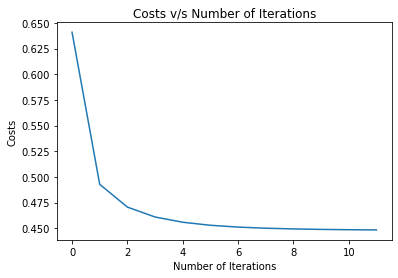

Coef: [[-3.5568686   0.08405048 -0.68490214  0.22616804 -1.08233513  0.80889583
   0.3094322  -0.37934248 -0.82815903 -0.21051735  0.06046017 -0.66601565
  -0.21292959 -0.32192377 -0.2484438  -0.1917547  -0.14236352]]
Intercept: [[-0.21231103]]
Cost on test: 0.461375349848466


In [53]:
y_predict = LogisticRegression(train_x, test_x, train_y, test_y, 12000, 0.03)

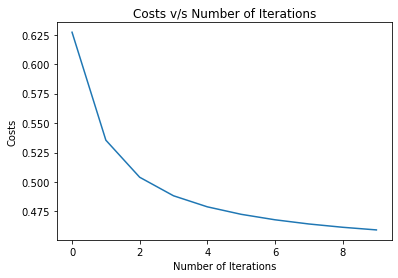

Coef: [[-2.49514576  0.0944631  -0.40979967  0.23266862 -0.70630898  0.4734827
  -0.02952212 -0.18791849 -0.46668876  0.19644289 -0.01448515 -0.55805475
   0.00804572 -0.0570884  -0.06111712 -0.04418929  0.00932849]]
Intercept: [[-0.69400298]]
Cost on test: 0.46307568803223864


In [54]:
y_predict_1 = LogisticRegression(train_x, test_x, train_y, test_y, 10000, 0.01)

In [55]:
mean_squared_error(test_y, y_predict)

0.248

In [56]:
r2_score(test_y.T, y_predict.T)

-0.40033879164313957

In [57]:
mean_squared_error(test_y, y_predict_1)

0.22733333333333333

In [58]:
r2_score(test_y.T, y_predict_1.T)

-0.28364389233954457